In [51]:
import mne
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple
'''import os''' #some of you might need this
import warnings
warnings.filterwarnings('ignore') #For better display; it's usually NOT a good idea to suppress warnings

In [52]:
'''os.chdir('path_to_data')'''
eeglab_raw = mne.io.read_raw_eeglab('S1.set')
eeglab_epochs = mne.read_epochs_eeglab('S1_elist_bins_chop_be.set')

eeglab_epochs.event_id

Reading C:\Users\jowan\erpclass\S1.fdt
Extracting parameters from C:\Users\jowan\erpclass\S1_elist_bins_chop_be.set...
Not setting metadata
256 matching events found
No baseline correction applied
0 projection items activated
Ready.


{'B4(222)/205': 1,
 'B1(221)/201': 2,
 'B2(222)/201': 3,
 'B1(221)/202': 4,
 'B3(221)/206': 5,
 'B2(222)/202': 6,
 'B3(221)/205': 7,
 'B4(222)/206': 8}

In [53]:
Evokeds_Dict = namedtuple('Evokeds_Dict', ['Evokeds_List','All_Bins'])
evokeds_dict = Evokeds_Dict([eeglab_epochs[v].average() for v in ['B1(221)','B2(222)','B3(221)','B4(222)']],
                            ['B1(221)','B2(222)','B3(221)','B4(222)'])

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [54]:
evokeds, all_bins = evokeds_dict

trange = (evokeds[0].first, evokeds[0].last+1)
t = [i for i in range(trange[0], trange[1])]

n_bins = len(evokeds)
n_chs, n_times = evokeds[0].get_data().shape
data = np.array([evokeds[i].get_data(units='uV')
                 for i in range(len(evokeds))], dtype=object).reshape(n_bins, n_chs, n_times)

ch_dict = {}
for i, x in enumerate(evokeds[0].ch_names):
    ch_dict[x] = i

chs_to_plot, bins_to_plot = ['FZ','FCZ','CZ','CPZ','PZ'], ['B1(221)','B2(222)']
linestyles, colors = ['solid','solid'], ['navy','deepskyblue']

savefig, filepath = False, None

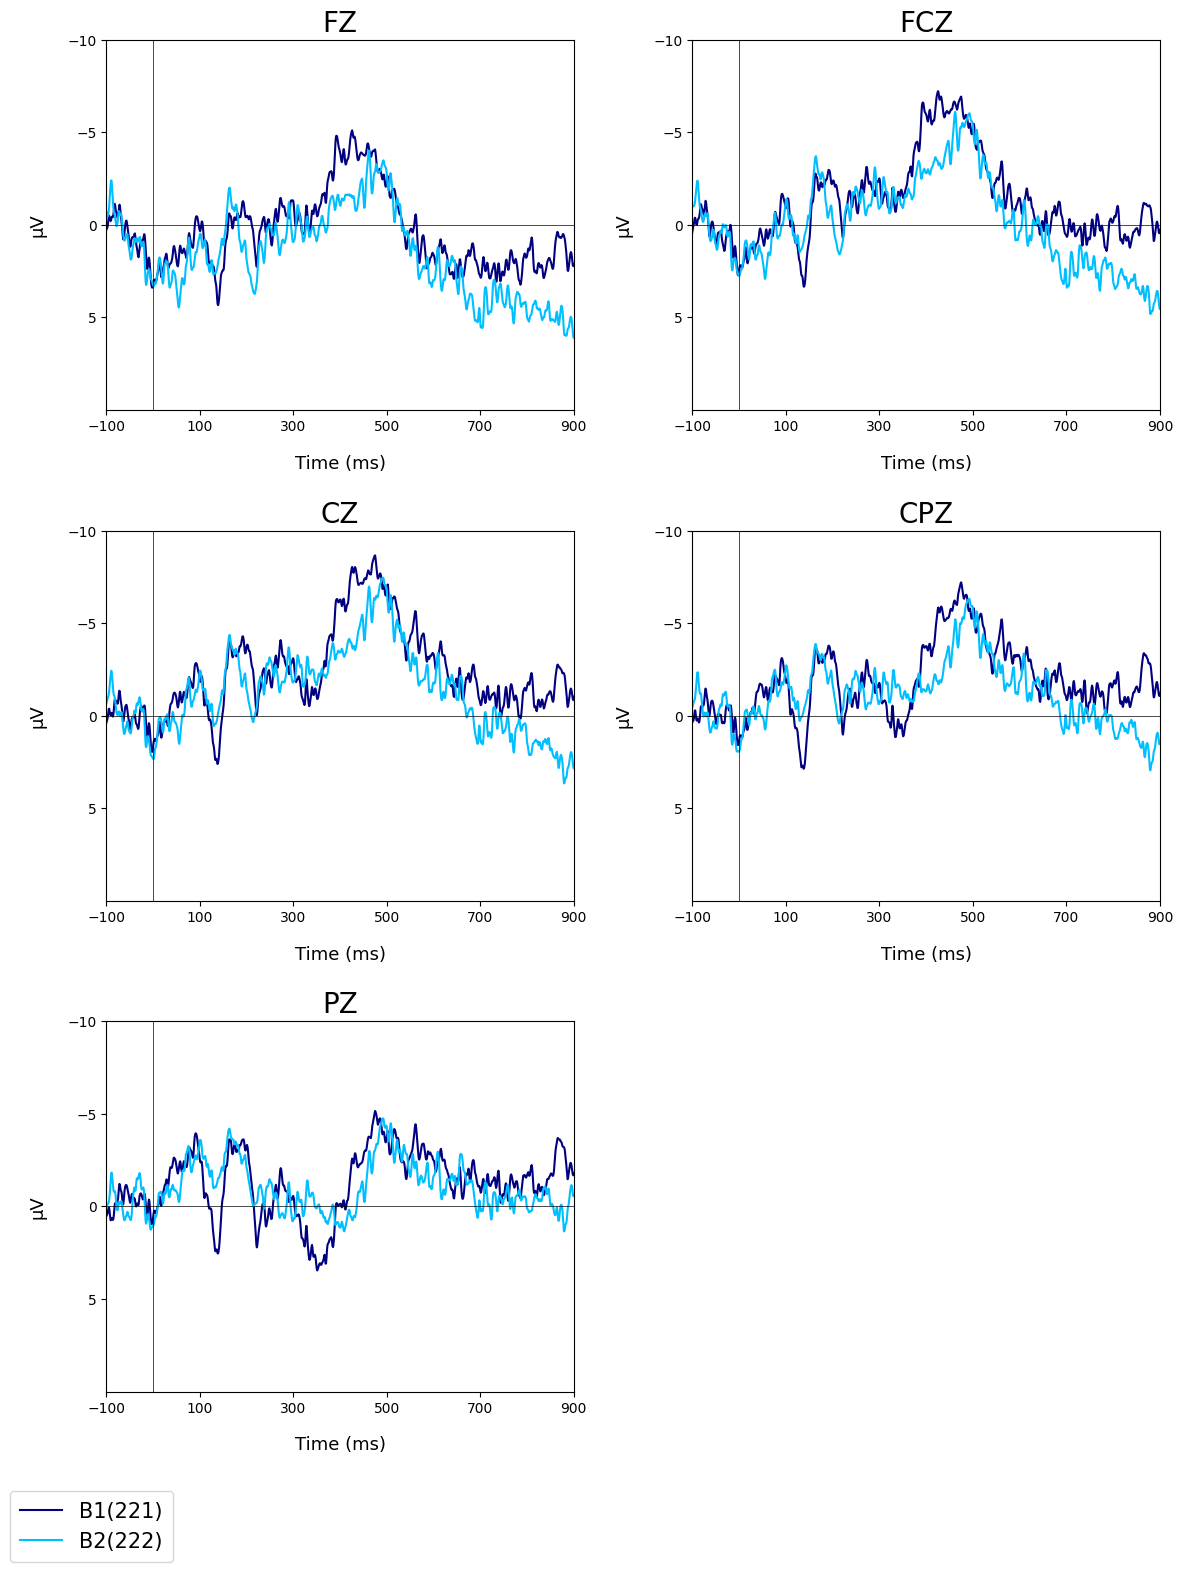

In [70]:
nrows, ncols = 3, 2
figsize = (12, 15)

figure, axes = plt.subplots(nrows, ncols, figsize=figsize, sharey=True)
axes_flat = axes.copy().flatten()
for ax, ch in zip(axes_flat, chs_to_plot):
    for i, x in enumerate(bins_to_plot):
        ax.plot(t, data[all_bins.index(x)][ch_dict[ch]],
                linestyle=linestyles[i], color=colors[i], label=x)
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(ch, fontsize=20)
    ax.set_xlabel('Time (ms)', labelpad=15, fontsize=13)
    ax.set_xlim(-100, 900)
    ax.set_xticks(list(range(-100,901,200)))
    ax.set_ylim(-10, 10)
    ax.set_yticks(list(range(-10,10,5)))
    ax.set_ylabel('µV', labelpad=15, fontsize=13)
    ax.invert_yaxis()
    ax.yaxis.set_tick_params(labelbottom=True)
    hdl, lbl = ax.get_legend_handles_labels()
for ax in axes_flat:
    if not ax.lines: ax.remove()
figure.legend(hdl, lbl, loc='upper left', bbox_to_anchor=[-0.001, 0.001], fontsize=15, borderpad=0.5)
figure.tight_layout(pad=2)
if savefig == True: plt.savefig(filepath)
plt.show()

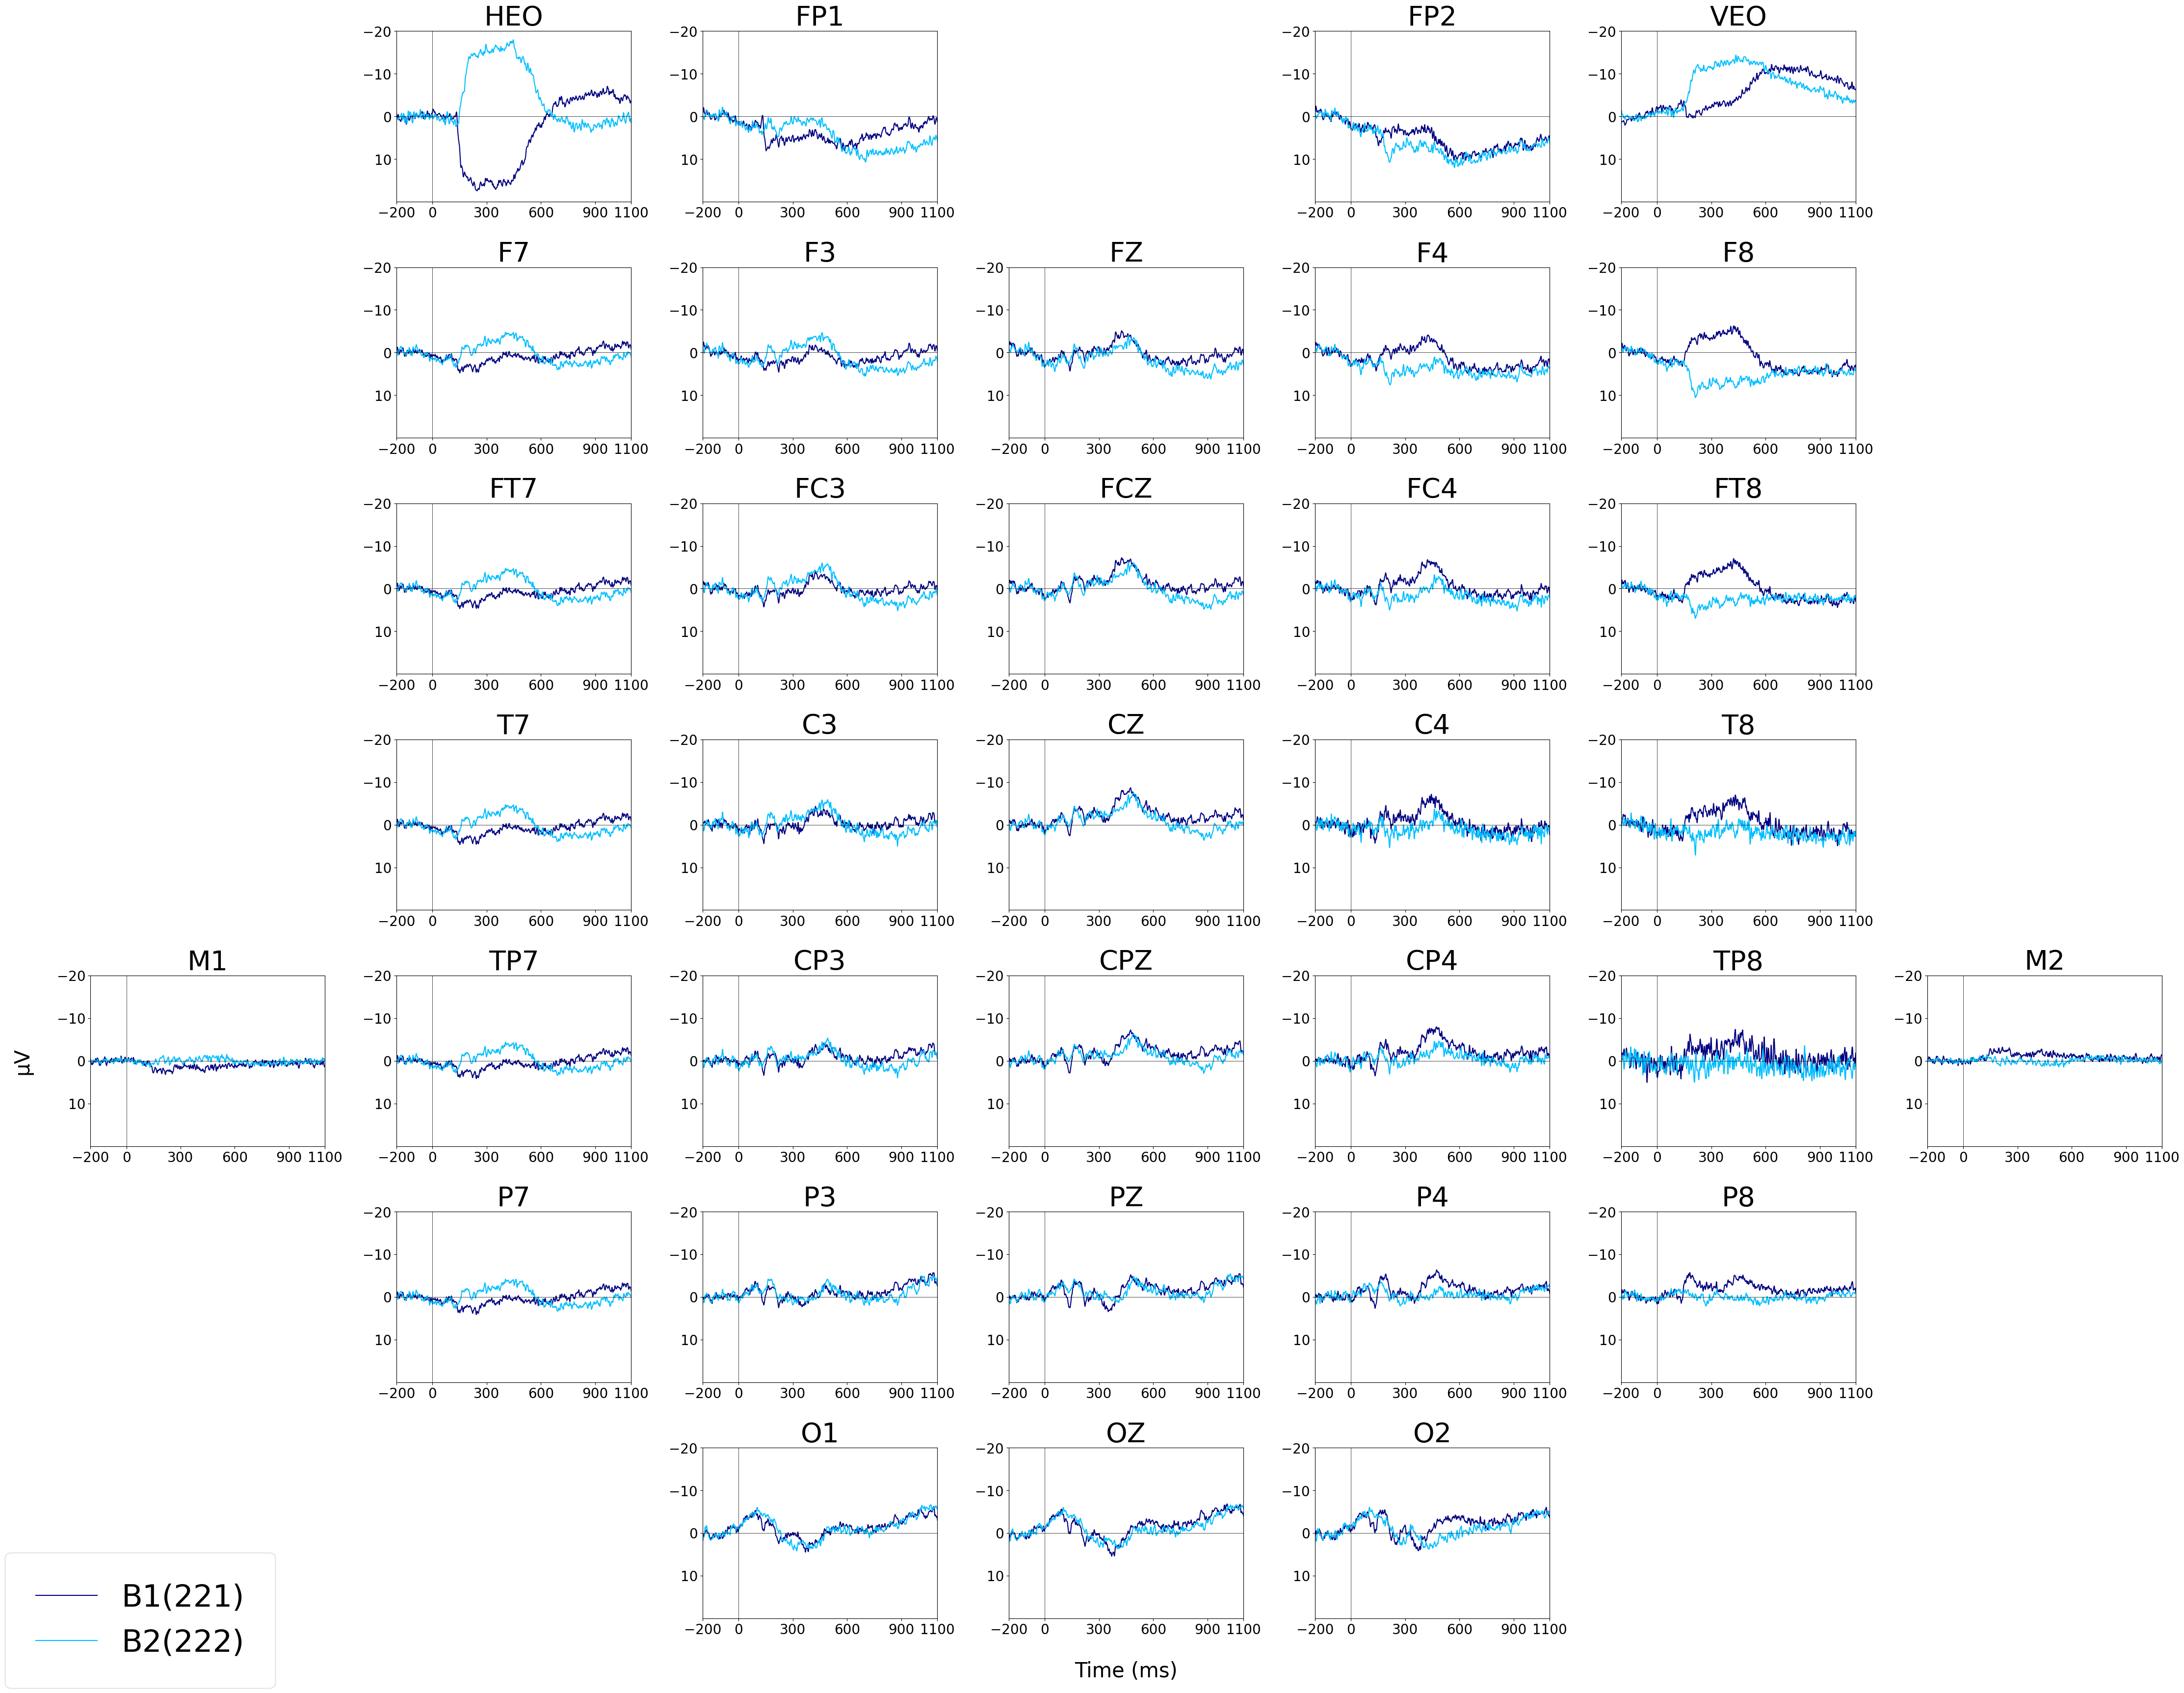

In [46]:
chs_to_plot = evokeds[0].ch_names
pos_dict = {'HEO':1,'FP1':2,'FP2':4,'VEO':5,
                'F7':8,'F3':9,'FZ':10,'F4':11,'F8':12,
                'FT7':15,'FC3':16,'FCZ':17,'FC4':18,'FT8':19,
                'T7':22,'C3':23,'CZ':24,'C4':25,'T8':26,
                'M1':28,'TP7':29,'CP3':30,'CPZ':31,'CP4':32,'TP8':33,'M2':34,
                'P7':36,'P3':37,'PZ':38,'P4':39,'P8':40,
                'O1':44,'OZ':45,'O2':46}
keys, vals = list(pos_dict.keys()), list(pos_dict.values())

nrows, ncols = 7, 7
figsize = (45,35)
figure, axes = plt.subplots(nrows, ncols, figsize=figsize, sharey=True)
for (m,n), ax in np.ndenumerate(axes):
    if m*ncols+n == 45: ax.set_xlabel('Time (ms)', fontsize=30, labelpad=35.0)
    if m*ncols+n == 28: ax.set_ylabel('µV', fontsize=30, labelpad=35.0)
    try:
        if keys[vals.index(m*ncols+n)] not in chs_to_plot: ax.remove()
    except ValueError:
        ax.remove()
            
for ch in chs_to_plot:
    ax = plt.subplot(nrows, ncols, pos_dict[ch]+1)
    for i, x in enumerate(bins_to_plot):
        ax.plot(t, data[all_bins.index(x)][ch_dict[ch]], linestyle=linestyles[i], color=colors[i], label=x)
    ax.axvline(x=0, color='black', linewidth=0.5)
    ax.axhline(y=0, color='black', linewidth=0.5)
    ax.set_title(ch, fontsize=40)
    ax.set_xlim(-200,1100)
    ax.set_xticks([-200,0,300,600,900,1100])
    ax.set_ylim(-20, 20)
    ax.set_yticks(list(range(-20,20,10)))
    ax.invert_yaxis()
    ax.yaxis.set_tick_params(labelbottom=True, labelsize=20)
    ax.xaxis.set_tick_params(labelbottom=True, labelsize=20)
    hdl, lbl = ax.get_legend_handles_labels()
figure.legend(hdl, lbl, loc='lower left', bbox_to_anchor=[-0.001, -0.001], fontsize=45, borderpad=1)
figure.tight_layout(pad=3)
if savefig == True: plt.savefig(filepath)
plt.show()